# <font style = "color:rgb(50,120,229)">Object Detection using Haar Cascades</font>


# <font style = "color:rgb(50,120,229)">Overview</font>

In the previous weeks, we discussed Object detection based on HOG features. In this module, we will take the example of Face detection to explain Object detection. The same concepts apply to general object detection too. 

Let’s go back a few years to 2001, when face detection was more of a research topic and many methods were proposed which didn’t work very well. Paul Viola and Michael Jones came up with their seminal [paper](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=G2-nFaIAAAAJ&citation_for_view=G2-nFaIAAAAJ:u5HHmVD_uO8C) which not only detected faces robustly, but did so in real-time. It is one of the most cited papers in Computer Vision. It is worth discussing their approach as they proposed some new ideas through this paper.

In the following sections, we will learn how to use haar cascade based face and smile detectors in OpenCV. Then we will cover the theory of Face detection in brief. Finally, we will learn how to train your own haar cascade based object detector in OpenCV. We will learn to train an eye detector. 

# <font style = "color:rgb(50,120,229)">Face Detection in OpenCV</font>

In this section, we will see a demo of the face detection implementation using Haar cascades in OpenCV. We will also see a smile detection demo and how to use both the cascades for detecting face and smile in an image. The trained model for face detection and smile detection is present in the models folder, which is downloaded from [here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

The face detector is contributed by [Prof. Dr. Rainer Leinhart](http://www.multimedia-computing.de/wiki/Prof._Dr._Rainer_Lienhart) and the smile detector by [Deniz Suarez](http://visilab.etsii.uclm.es/personas/oscar/oscar.html). The models are kept in xml files. There are other haar cascade based object detectors in OpenCV which are trained by various researchers and shared through OpenCV such as eye detector, profile face detector, cat face detector, pedestrian detector.  

The main function used in the demo is that of `detectMultiscale`

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors]])
```

Where,

- **`image`** is the input grayscale image.
- **`objects`** is the rectangular region enclosing the objects detected
- **`scaleFactor`** is the parameter specifying how much the image size is reduced at each image scale. It is used to create the scale pyramid. 
- **`minNeighbors`** is a parameter specifying how many neighbors each candidate rectangle should have, to retain it. Higher number gives lower false positives.

## <font style = "color:rgb(50,120,229)">Face Detection</font>

In this example, we discuss the effect of the parameters. The effect of `scaleFactor` is mostly related to speed. Lower the value, slower will be the speed. In this example, we check the effect of the `minNeighbors` parameter. As the value of this variable is increased, false positives are decreased.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Load the cascade classifier from the xml file.
faceCascade = cv2.CascadeClassifier(DATA_PATH + 'models/haarcascade_frontalface_default.xml')
faceNeighborsMax = 10
neighborStep = 1

In [4]:
# Read the image
frame = cv2.imread(DATA_PATH + "images/hillary_clinton.jpg")
frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

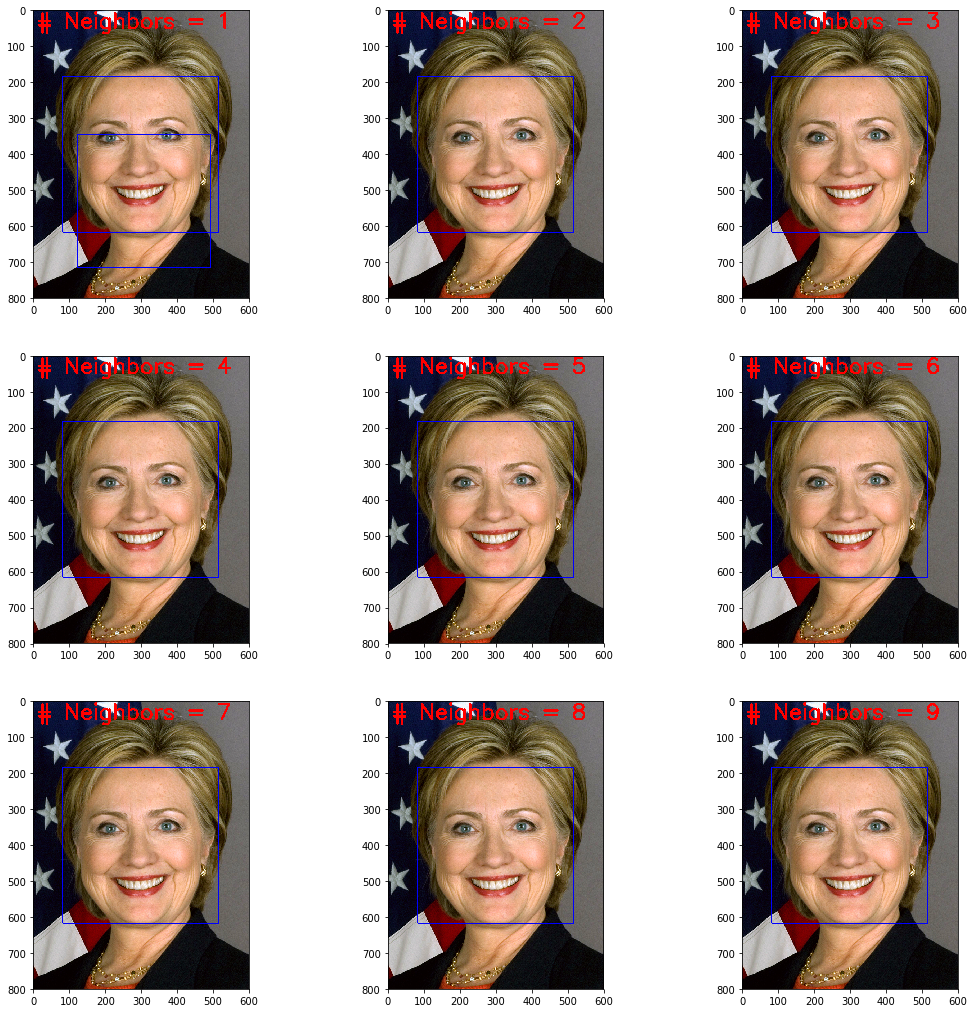

In [8]:
# Perform multi scale detection of faces
plt.figure(figsize=(18,18))
count = 1
for neigh in range(1, faceNeighborsMax, neighborStep):
    faces = faceCascade.detectMultiScale(frameGray, 1.2, neigh)
    frameClone = np.copy(frame)
    for (x, y, w, h) in faces:
        cv2.rectangle(frameClone, (x, y), 
                      (x + w, y + h), 
                      (255, 0, 0),2)

    cv2.putText(frameClone, 
    "# Neighbors = {}".format(neigh), (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 6)
    
    plt.subplot(3,3,count)
    plt.imshow(frameClone[:,:,::-1])
    count += 1

plt.show()

## <font style = "color:rgb(50,120,229)">Face and Smile Detection</font>

The effect of minNeighbors was not very pronounced in the face detection example as the face has very unique features. The mouth or smile on the other hand is very difficult to detect without false positives. This is illustrated using the example.

In [6]:
# Detect the face using the cascade
faceCascade = cv2.CascadeClassifier(DATA_PATH + 'models/haarcascade_frontalface_default.xml')
smileCascade = cv2.CascadeClassifier(DATA_PATH + 'models/haarcascade_smile.xml')
smileNeighborsMax = 90
neighborStep = 10

frame = cv2.imread(DATA_PATH + "images/hillary_clinton.jpg")

frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(frameGray, 1.4, 5)

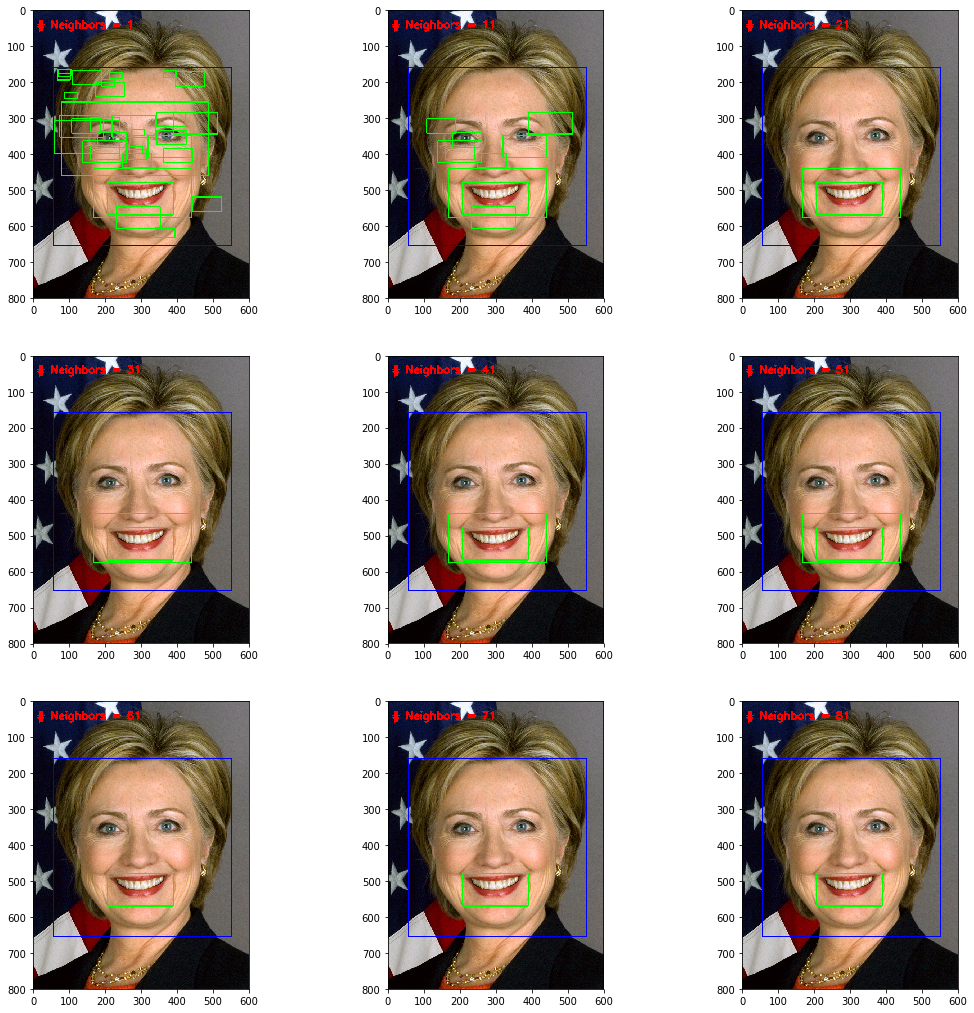

In [7]:
# Get the face area from the detected face rectangle
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), 
                  (x + w, y + h), 
                  (255, 0, 0), 2)
    faceRoiGray = frameGray[y: y + h, x: x + w]
    faceRoiOriginal = frame[y: y + h, x: x + w]

count = 1
plt.figure(figsize=(18,18))
# Detect the smile from the detected face area and display the image
for neigh in range(1, smileNeighborsMax, neighborStep):
    smile = smileCascade.detectMultiScale(faceRoiGray, 
                          1.5, neigh)

    frameClone = np.copy(frame)
    faceRoiClone = frameClone[y: y + h, x: x + w]
    for (xx, yy, ww, hh) in smile:
        cv2.rectangle(faceRoiClone, (xx, yy), 
                      (xx + ww, yy + hh), 
                      (0, 255, 0), 2)

    cv2.putText(frameClone, 
              "# Neighbors = {}".format(neigh), 
              (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1,
              (0, 0, 255), 4)
    plt.subplot(3,3,count)
    plt.imshow(frameClone[:,:,::-1])
    count += 1

plt.show()

# <font style = "color:rgb(50,120,229)">Face Detection Theory</font>

The image is divided into sub windows and multiple Haar-like features are computed at different scales and positions for each sub window. The important features are selected using the Adaboost algorithm. Then each sub window is checked for the presence or absence of face using a cascade of classifiers. The detection algorithm uses a cascade of classifiers which use Haar-like features. Thus, it is also called haar cascades based detector.

## <font style = "color:rgb(50,120,229)">What are Haar Features?</font>



|  <center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-harrFeatureexapmle.png"/></center> |  <center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-haarFeatureVariousSclae.png"/></center> |
| -------- | -------- |
| <center>Example Haar features</center>     | <center>Features at various scale</center>    |

&nbsp;
Haar features are rectangular elements inspired from [Haar wavelets](https://en.wikipedia.org/wiki/Haar_wavelet). The value of a feature is obtained by subtracting the sum of all pixels in the white region from that of the black region. 

$$
f = \Sigma(\text{ pixels in black area }) − \Sigma( \text{ pixels in white area })
$$

Some examples are shown in the diagram above. The intuition is that these features can detect edges, lines and other patterns in an image. These features are computed at different scales and different locations as shown above. 

<table>
    <tr>
        <th><center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-relevantHaarFeature3.png" width=700/></center></th>
        <th><center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-relevantHaarFeature1.png" width=700/></center></th>
        <th><center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-irrelevantHaarFeature.png" width=700/></center></th>
    </tr>
    <tr>
        <td colspan="2"><center>Relevant Haar Features</center></td>
        <td><center>Irrelevant Feature</center></td>
    </tr>
</table>

In the figure shown above, when feature **A** is computed at the location shown in the first image, it will give a high value as the bridge is lighter than the nearby area. But if it is computed at some other scale or location as shown in the third image, the feature will give much lower value. Thus, it is a good feature for detecting features that resemble the nose bridge. 

Similarly, when feature **B** is computed as shown in the second image, it can detect the eye region since the eye region is darker as compared to the region below it. Features **C** and **D** can be used to detect other features and more complex patterns. 

It should be noted that only a single feature is not capable of detecting faces with high accuracy. But, when many such features vote for the presence or absence of face, the detection becomes very accurate and robust.

For a 24 x 24 window used for detecting faces,  we need to compute the feature value at different scales and positions which amounts to ~160,000 features. It will be computationally expensive to find all the features even when the feature computation involves simple operations like addition and subtraction. To tackle this problem, the authors used Integral Image; an idea borrowed from previous work in computer vision and graphics. 

## <font style = "color:rgb(50,120,229)">What is an Integral Image?</font>

It is a [summed-area table](https://en.wikipedia.org/wiki/Summed-area_table) whose value at a pixel ( x, y ) is the sum of all pixel values above and to the left of that pixel. As we shall see later, once the integral image is computed, the computation of haar features can be done efficiently in constant time.

<center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-image1.png"/></center>

For the pixel ( x, y ) in the Image $I$ shown, the Integral Image $II$ is given by

$$
II( x, y ) = \sum_{\bf{i \le x , j \le y}} I( i, j )
$$

which is the sum of all pixels in the shaded region ( above and left of the pixel ( x, y ). The above formula can be written in recursive format and can be computed efficiently using the formula :

$$
II( x, y ) = I(x,y) + II(x,y−1) + II(x−1,y) − II(x−1,y−1)
$$



The important thing to note is that we can compute the Integral Image ( $II$ ) in a single pass using the above formula. We can use it to calculate the sum of pixel values of any rectangular block in the image, using just 3 arithmetic operations ( 1 addition and 2 subtractions ). 

Suppose, we want to find the sum of all pixels in the shaded rectangular region <u>abcd</u> for the image given below, the required sum using Integral Image $II$ is given by : 

$$
\sum_{x,y \in abcd} I(x,y) = II(a) + II(d) − II(c) − II(b)
$$

The image below illustrates the above formula. 

<center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-image2.png"/></center>

## <font style = "color:rgb(50,120,229)">Feature Selection using Adaboost</font>

As mentioned earlier, not all features are useful for a classification task. Therefore, a feature selection algorithm is proposed so that only a subset of features need to be computed at test time. These special features are selected using the Adaboost algorithm. 

The training algorithm selects the best features and learns the classifier simultaneously. It uses the notion of weak classifiers, which perform slightly better than random guessing. Let $h_i$ be a weak classifier, which is given by :

$$
h_{i}({\mathbf {x}})={\begin{cases} −1&{\text{if }}f_{i}<\theta _{i}\\ 1&{\text{otherwise}}\end{cases}}
$$

Where, $x$ is the image sub window under consideration, $f_i$ is the computed feature, $\theta_i$ is the threshold which is learned during the training process.

Multiple weak classifiers are combined to build a strong classifier. The strong classifier is represented as a linear combination of weak classifiers.

$$
\bf{h(x)} = \bf{sign}(\sum_i (\alpha_i h_i(x))
$$  

where, $h(x)$ is the strong classifier and $\alpha_i$ are the weights which indicate the contribution of each weak classifier towards the final classifier. They are learnt during training.

## <font style = "color:rgb(50,120,229)">Cascade of Classifiers</font>

This is the final stage of the pipeline. The sub windows are passed through a cascade of classifiers which detects whether a face is present or not. The functional block diagram of the same is given below.

<center><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w7-m4-blockDiagram.png"/></center>

The idea behind using this cascade of classifiers is that most of the sub windows in an image will not contain the face. So, why waste resources in evaluating all features in that sub window. We want to evaluate the features of only those sub windows which are the most promising candidates for having a face. 

The first classifier uses only one feature. It rejects those sub windows which do not contain faces with high accuracy. The sub windows which are not rejected by the initial classifiers are evaluated by the classifier in the next stages. As we move forward in the cascade, the number of features evaluated increases and thus the complexity of the classifier also increases. This also makes the later stages more accurate in detecting faces. The face detection cascade used in the paper had 38 stages and more than 6000 features.

For example, the first stage uses only one feature, if a face is present, it detects them almost 100% of the time with a false positive rate of 50%. Similarly, the second stage uses 10 features and has a FPR of 20% and so on. We get the final output ( face or no face ) from the last stage which has a very low error rate.

# <font style = "color:rgb(50,120,229)">References and Further Reading</font>

1. [https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework](https://en.wikipedia.org/wiki/Viola%E2%80%93Jones_object_detection_framework)

2. [http://www.merl.com/publications/docs/TR2004-043.pdf](http://www.merl.com/publications/docs/TR2004-043.pdf)

3. [http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

4. [http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)

5. [http://docs.opencv.org/3.2.0/db/d28/tutorial_cascade_classifier.html](http://docs.opencv.org/3.2.0/db/d28/tutorial_cascade_classifier.html)

6. [http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html](http://docs.opencv.org/trunk/dc/d88/tutorial_traincascade.html)

7. [http://www.pyimagesearch.com/2015/05/11/creating-a-face-detection-api-with-python-and-opencv-in-just-5-minutes/](http://www.pyimagesearch.com/2015/05/11/creating-a-face-detection-api-with-python-and-opencv-in-just-5-minutes/)

8. [http://docs.opencv.org/2.4/doc/tutorials/core/file_input_output_with_xml_yml/file_input_output_with_xml_yml.html](http://docs.opencv.org/2.4/doc/tutorials/core/file_input_output_with_xml_yml/file_input_output_with_xml_yml.html)